In [5]:
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [106]:

def extract_messages_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    messages = re.findall(r'<p>(.*?)</p>', content)
    return messages

def extract_messages_from_folder(folder_path):
    all_messages = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            file_path = os.path.join(folder_path, filename)
            messages = extract_messages_from_html(file_path)
            all_messages.extend(messages)
    return all_messages

def generate_wordcloud(text):
    # Process the text to get word frequencies
    word_list = text.split()
    # Remove words that contain '@', '[', '&', and ')'
    filtered_word_list = [word for word in word_list if '@' not in word and '[' not in word and '&' not in word and ')' not in word]

    # Calculate word frequencies
    word_freq = {word: filtered_word_list.count(word) for word in set(filtered_word_list)}

    # Balance the word frequencies: Cap them at 40
    word_freq = {word: min(freq, 15) for word, freq in word_freq.items()}

    # Additional stopwords
    # Manually set the frequency of certain words
    # word_freq['太难'] = 60
    # word_freq['黄蕉'] = 40
    # word_freq['还我血汗钱！！！'] = 20
    # Define a list of words to remove
    stopwords_add = ['why', 'why:', '图片','[图片]','带有引用的文本消息','解析失败','[带有引用的文本消息]解析失败','解析失败[图片]','撤回了一条消息&lt;/revokemsg&gt;',
                 '[破涕为笑]','[偷笑]','[呲牙]','哈','哈哈','哈哈哈','哦哦','是的','嗯','哎','哼!!','[捂脸]','[阴险]','[强]', '=', '是啊', '我去', '拍了拍', '拍了拍我', 
                 '对对对', '不行', '好吧', '恩', '嗯', '国企王总', '没有', '不知道', '可以', '真好', '对的', '?', '羡慕', '牛逼', '啧啧啧', '真的', '假的', '就是', 
                 '可以的', '我擦', '老王', '50', '不会', '不是', '6', '收', '正常', '卧槽', '不错', 'you', '对啊', 'love', '有用', '不要', '不行', '不行啊', '不行不行',
                 '算了', 'time', '30', '嗯呢', '确实', '谢谢', '嗯嗯', '邻居们', '各位高邻']
    
    with open("baidu_stopwords.txt", 'r',encoding='utf-8') as file:
        stopwords = file.read().split()
    # Remove the stop words from the frequencies dictionary
    for word in stopwords:
        word_freq.pop(word, None)
    for word in stopwords_add:
        word_freq.pop(word, None)
    # Create a word cloud using the custom font
    wordcloud = WordCloud(font_path='STXINGKA.TTF', width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq)
    # Plot the word cloud

    plt.figure(figsize = (20,10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


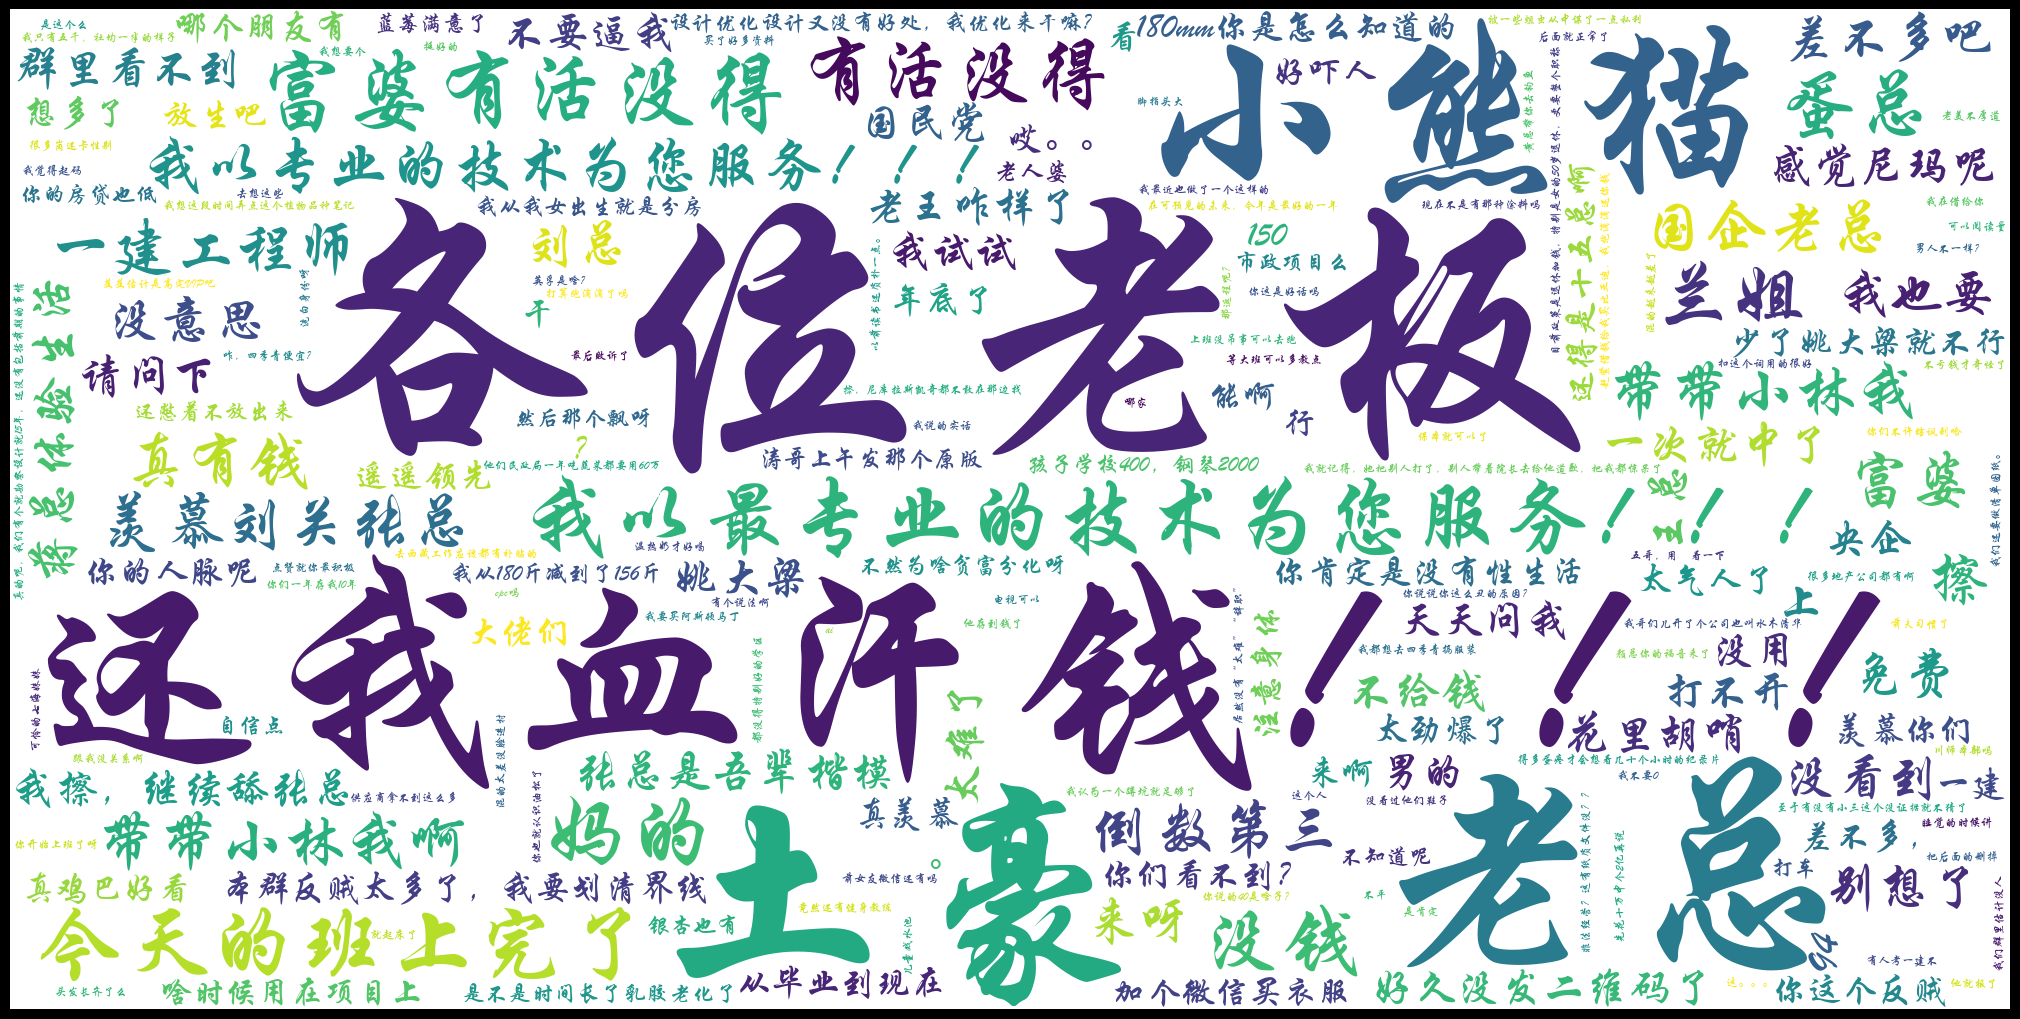

In [107]:

# 替换以下路径为您的文件夹路径
folder_path = r'D:\Downloads\export\396573373@chatroom_扯几把单_'
extracted_messages = extract_messages_from_folder(folder_path)

# 将所有消息合并为一个长字符串，用于生成词云
combined_messages = ' '.join(extracted_messages)
generate_wordcloud(combined_messages)


In [50]:
extracted_messages

['大锅面',
 '碗大',
 '真精致',
 '精致的猪猪女孩',
 '2014以上的天正日照分析竟然不能用',
 '曾院真他妈厉害 啥都会用',
 '@海南__林\u2005@辉煌\u2005@朱志宽\u2005大佬 手里有没有面积在40平米左右的卫生间的建筑图纸？',
 '我的201天正 发神经 还打不开 重装了也没有用',
 '没有 这是公园公共厕所呀',
 '[带有引用的文本消息]解析失败',
 '还是win10系统',
 '',
 '@十三\u2005',
 '收',
 '[强]厉害 帅林啥都有',
 '[带有引用的文本消息]解析失败',
 '几个月前用着用着突然就这样了。[难过] ',
 '有没有更小的 这个还是大[流泪]',
 'cad 天正都重装过[微笑]',
 'https://mp.weixin.qq.com/s/AbbtXlI4qMYGD6111OaiGg',
 '[带有引用的文本消息]解析失败',
 '来啊  考军职啊',
 '有你岗位吗，',
 '快进去带我们飞',
 '看就要方向啊  不是写着工程吗',
 '工鬼工，方向是方向，专业是专业',
 '之前扒了一下，根本就不招我们的',
 '哦，你们男的说不定可以',
 '很多岗还卡性别',
 '@海南__林\u2005调起来多麻烦',
 '牵扯到各个专业',
 '[带有引用的文本消息]解析失败',
 '你不明白我这图是拿来干嘛的[破涕为笑]',
 '什么都想着弄好好给你  你就改个图框 哪有这么好的事',
 '主要是没时间',
 '概算的图谁还去改',
 '那就自己画',
 '所以想找成图',
 '不解释',
 '[发呆]那后期调整也麻烦',
 '[带有引用的文本消息]解析失败',
 '都没方案呢',
 '咱们项目操作应该不一样',
 '你就按大的做概算',
 '现在要砍造价怎么按照大的做',
 '淘宝淘宝',
 '整体坎800想在建筑上坎200左右',
 '愁死人了',
 '死脑筋',
 '[带有引用的文本消息]解析失败',
 '现在各专业都不太好降',
 '降了2轮了',
 '让绿化砍',
 '随便一操作，立马下来',
 '',
 '[带有引用的文本消息]解析失败',
 '@朱志宽\u2005收 谢谢',
 '买个成品不就行了',
 '干嘛非要出图',
 '',
 '结局有亮点',
 